## Classification Project

Financial Institution - We are having a campaign. We want people to subscribe to a term deposit. We have been recording our success rate on clients for a while. Can you tell us who we can convert based on their financial data?
We have their age, job, employees, their loans, if they have any credit defaults, when we called them, their education, etc., and we also recorded if our call was successful or not. What can we learn? What would be useful for us?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=10,10

bank = pd.read_csv('bank-additional-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
bank.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [3]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

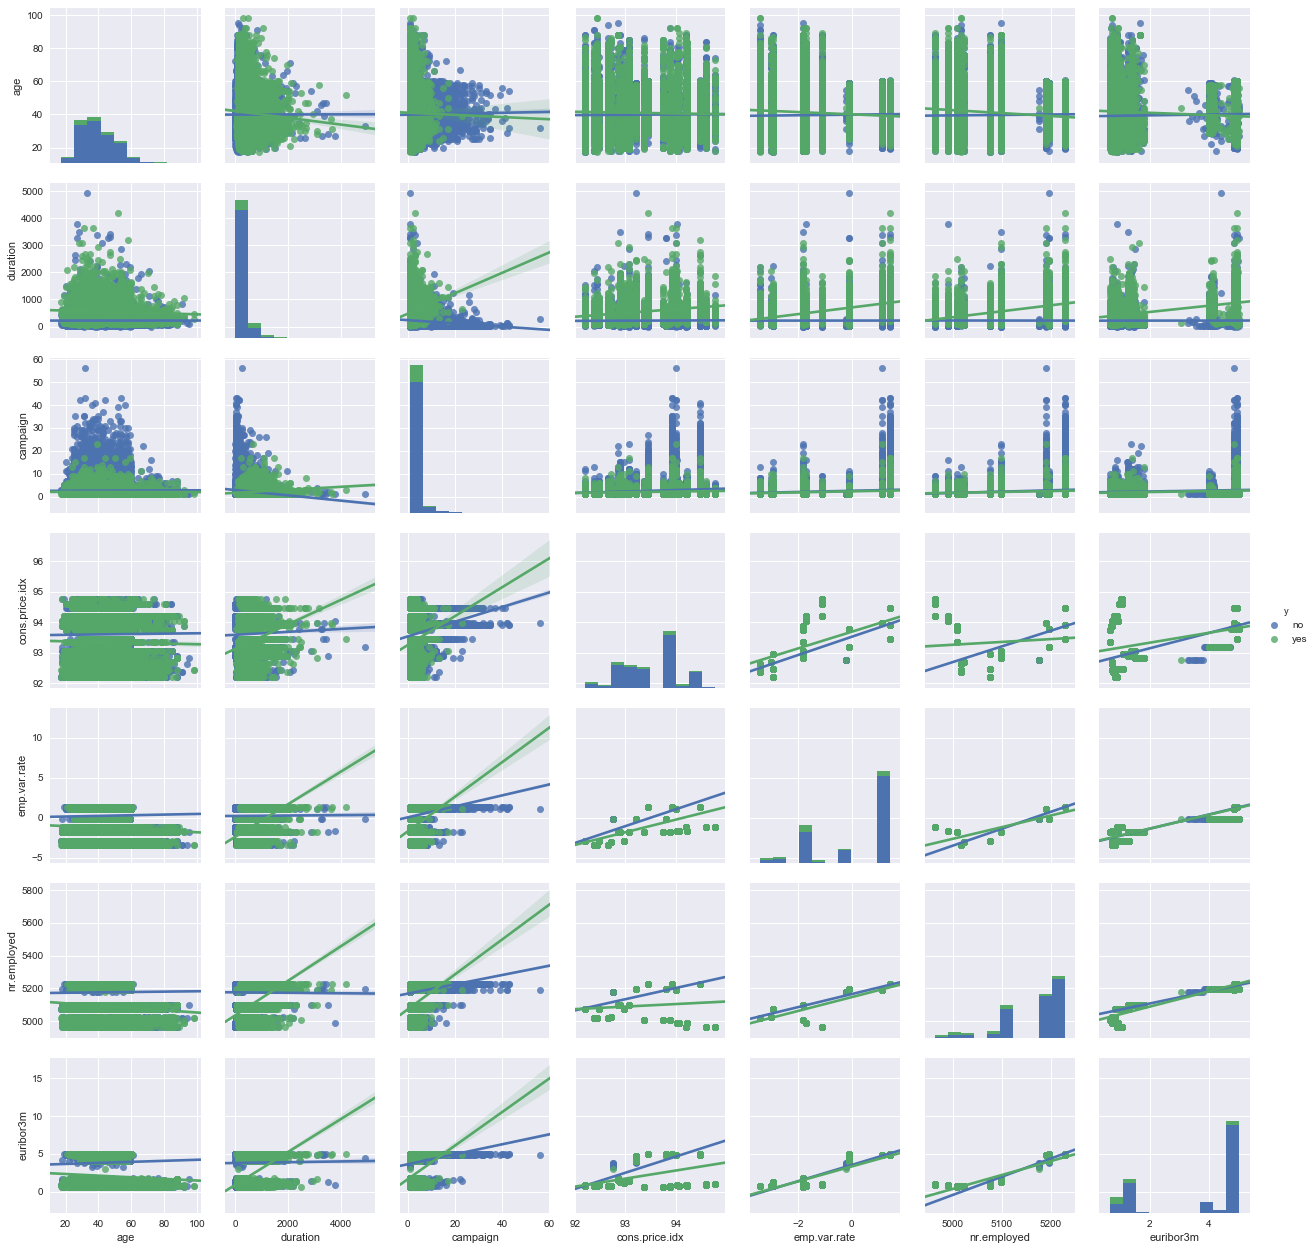

In [13]:
sns.pairplot(bank[['age', 'duration', 'campaign', 'cons.price.idx', 'emp.var.rate', 
                   'nr.employed', 'euribor3m','y']], hue="y", kind='reg')

There does seem to be some noticeable correlations between features from the pairplot, but we can check using a correlation matrix. However, there are some that look slightly positive and others negative, in terms of the regression line fit.

In [6]:
bank.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


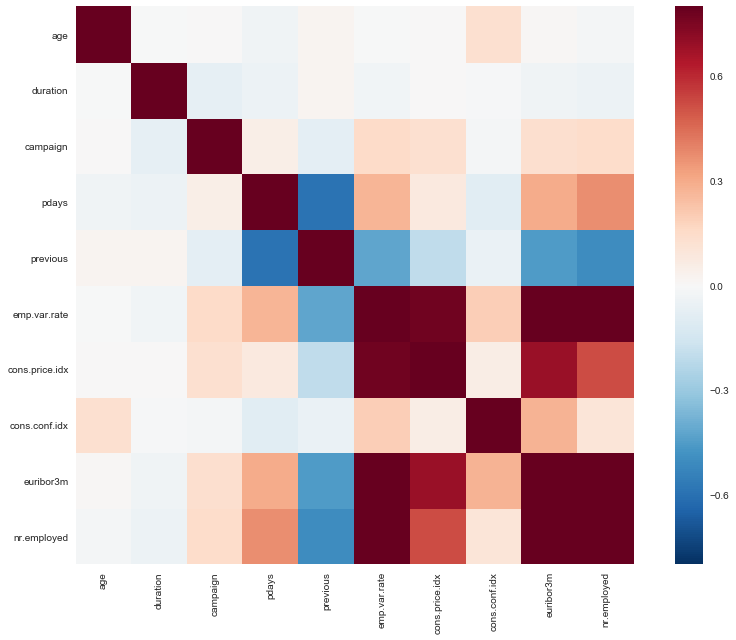

In [7]:
corrmat = bank.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)

f.tight_layout()
savefig

Very high correlations betwen emp.var.rate, cons.price.idx, euribor3m, and nr.employed. This could entail performing dimensionality reduction.

## Data
input variables:
## bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
## related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
## other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
## social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric) 
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)
## Output variable (desired target):
21. y: has the client subscribed a term deposit? (binary: 'yes','no')

It would be helpful to look at some relationships with categorical data and the output variable.

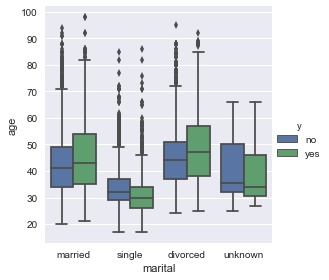

In [12]:
sns.factorplot(x='marital', y='age', hue='y', data=bank, kind='box')

The above factor plot does not show large differenes among marital status types that may affect the subscription outcome. However, age could be an important feature, depending on what model we use.

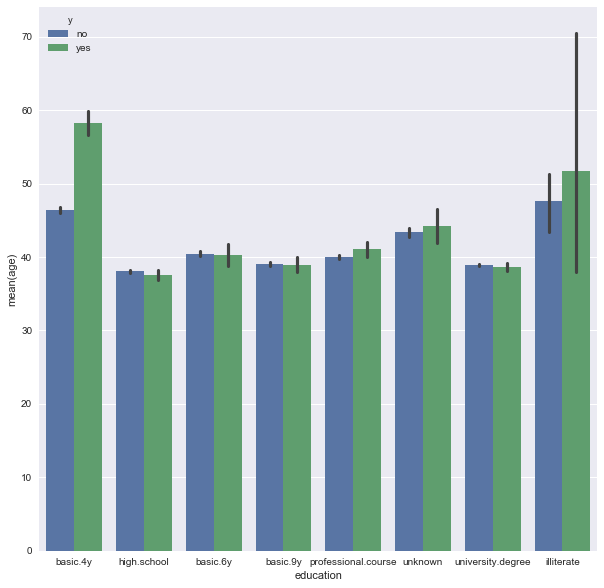

In [9]:
sns.barplot(x='education', y='age', hue='y', data=bank)

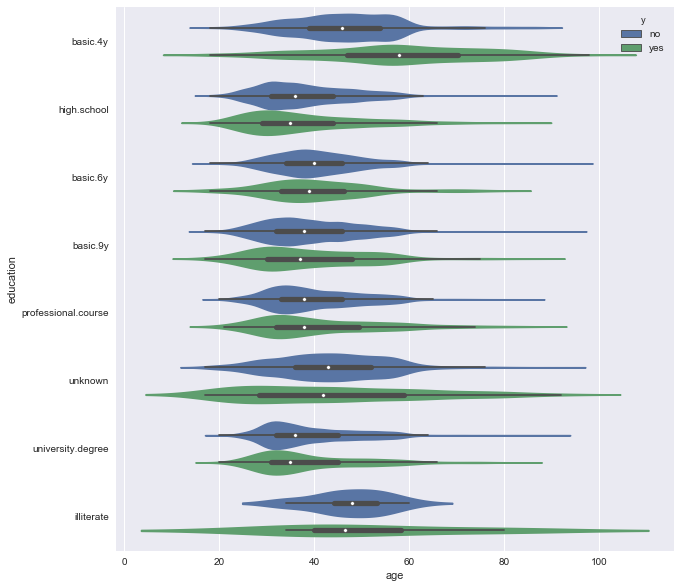

In [10]:
sns.violinplot(x='age', y='education', hue='y', data=bank)

There is not much difference between the distributions of yes/no subscriptions between the educations other than the basic 4 year education, which has a higher mean age for successful subscriptions. Again, this could be an important feature.

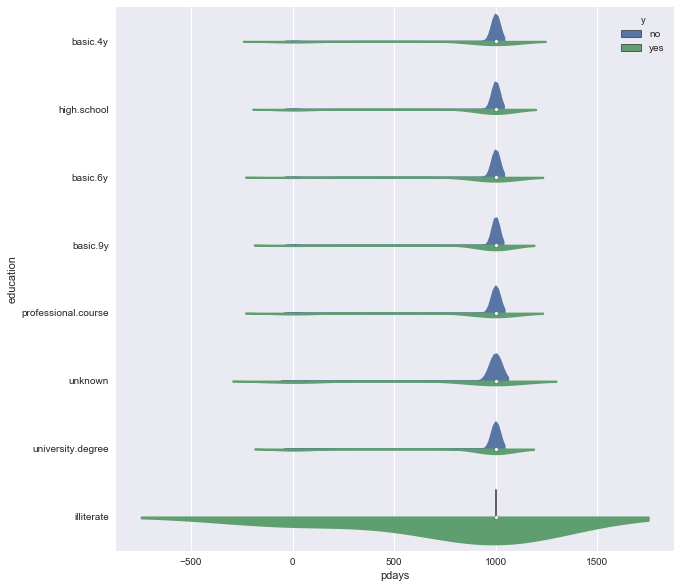

In [23]:
sns.violinplot(x='pdays', y='education', hue='y', data=bank, split=True)

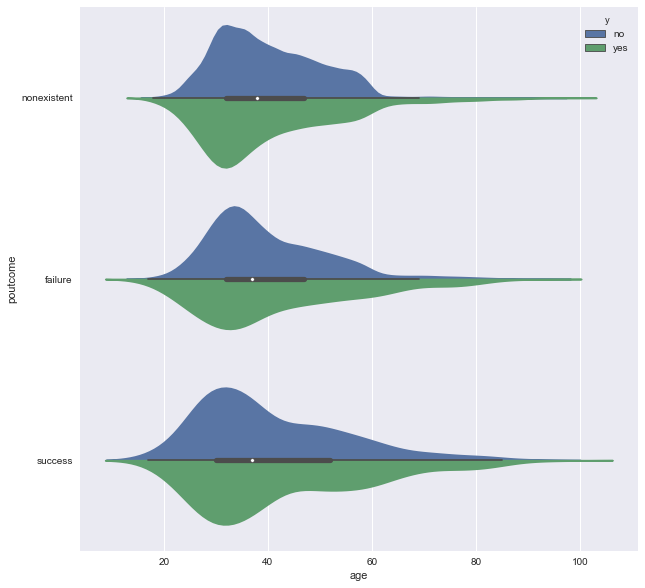

In [24]:
sns.violinplot(x='age', y='poutcome', hue='y', data=bank, split=True)

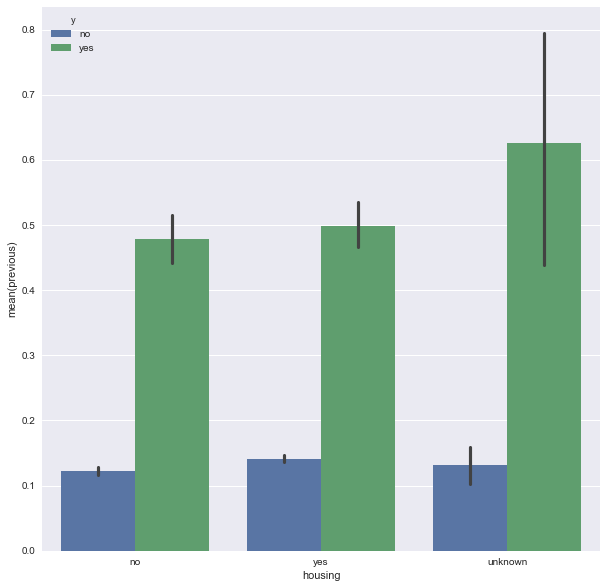

In [29]:
sns.barplot(x='housing', y='previous', hue='y', data=bank)

Looks like the previous number of contacts average was higher for those who successfully subscribed.

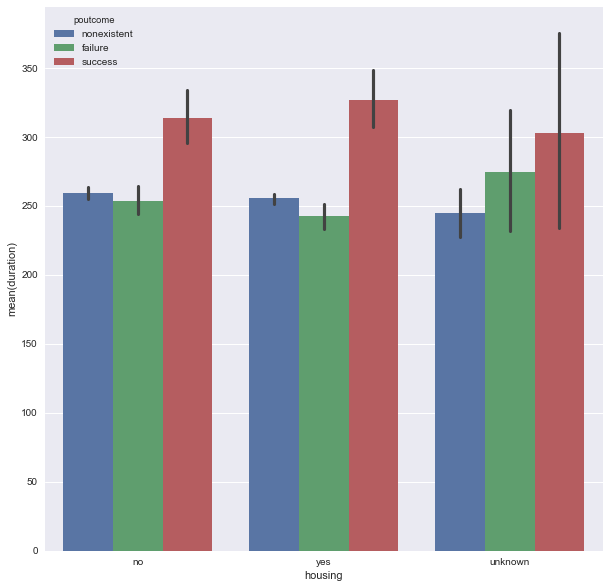

In [30]:
sns.barplot(x='housing', y='duration', hue='poutcome', data=bank)

Higher duration contacts on average were more successful during the previous campaign for each type of housing loan category.

# Data Manipulation

In [176]:
# Change Yes or No to 1 or 0, replace unknown with nan and drop

new = bank.replace(['yes', 'no'], [1, 0])
new.replace(['unknown'], [np.nan], inplace=True)
new = new.dropna()
new.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [177]:
# We'll change the pdays of 999 to 0 to indicate this person was contacted for the current campaign. Additionally
# we will drop the poutcome because we don't want any previous marketing campaigns to affect the outcome of this 
# campaign.

del new['poutcome']
del new['pdays']
del new['previous']
del new['duration']

In [178]:
new.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,0.0,0.0,0.0,telephone,may,mon,1,1.1,93.994,-36.4,4.857,5191.0,0


In [179]:
# Obtain dummies for the remaining categorical variables
new = pd.get_dummies(new, columns=['job', 'marital', 'education', 'contact', 'month', 'day_of_week'])
new.head()

,age,default,housing,loan,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,0.0,0.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,0,0
2,37,0.0,1.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,0,0
3,40,0.0,0.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,0,0
4,56,0.0,0.0,1.0,1,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,0,0
6,59,0.0,0.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,0,0


In [180]:
# obtain list of columns
col = new.columns.tolist()
col

['age',
 'default',
 'housing',
 'loan',
 'campaign',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed']

In [182]:
# Remove . from column headers
new.columns = ['age', 'default', 'housing', 'loan', 'campaign', 'emp_var_rate',
                'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin', 'job_blue-collar', 
                'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
                'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
                'marital_married', 'marital_single', 'education_basic_4y', 'education_basic_6y', 'education_basic_9y',
                'education_high_school', 'education_illiterate', 'education_professional_course',
                'education_university_degree', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
                'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
                'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']

In [183]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(new, train_size=0.3, random_state=1)

In [184]:
x_train = train.drop('y', axis=1)
y_train = train['y']

In [206]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
DTC.score(x_train, y_train)

0.99792258910999343

Looks like I got a score of almost 100, or 99.8%, even with a smaller train size.

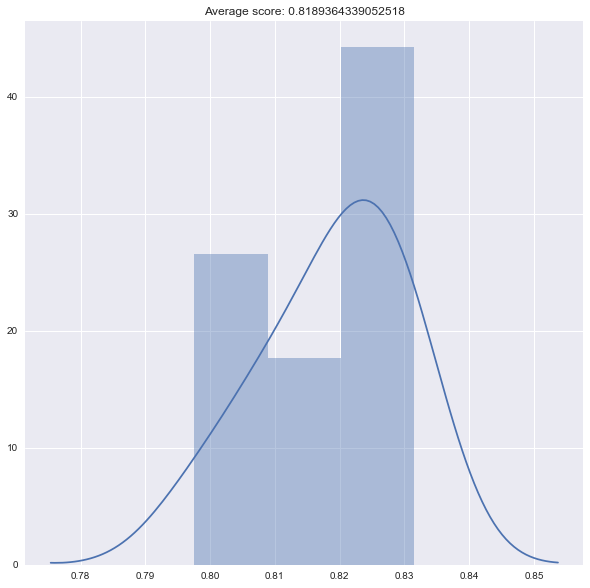

In [207]:
# Cross Validation

from sklearn.cross_validation import cross_val_score

cv_scores = cross_val_score(DTC, x_train, y_train, cv=10)
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

This shows how accurate on average the DTC performs on different training sets.

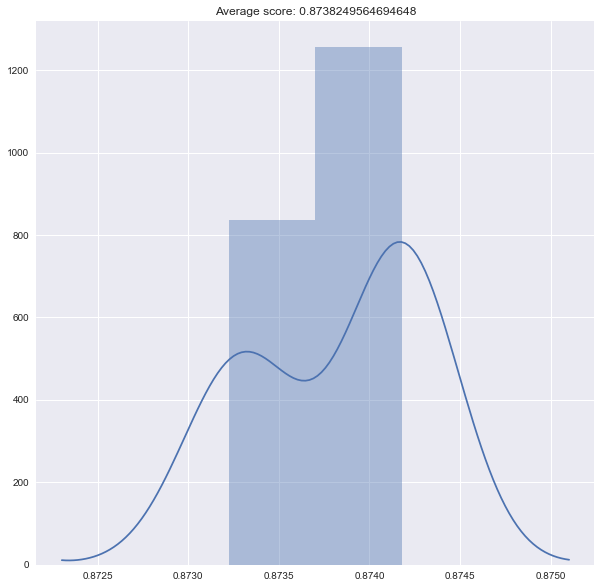

In [208]:
DTC = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(DTC, x_train, y_train, cv=10)
sns.distplot(cv_scores, kde=True)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Looks like we can obtain a higher accuracy average by limiting the number of depths.

# Fine Tuning Through Grid Search

In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

DTC = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1,2,3,4,5,6],
                  'max_features': [1,2,3,4,5,6]}

cross_val = StratifiedKFold(y_train, n_folds=10)

grid_search = GridSearchCV(DTC, param_grid=parameter_grid, cv=cross_val)

grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8788541438880385
Best parameters: {'max_depth': 6, 'max_features': 5}


We actually obtain that the best depth is 6 and the best number of features is 5.

In [234]:
# Using grid search with more parameter tuning

DTC = DecisionTreeClassifier()

parameter_grid = {'splitter': ['best', 'random'],
                  'criterion': ['gini', 'entropy'],
                  'max_depth': [1,2,3,4,5,6],
                  'max_features': [1,2,3,4,5,6]}

cross_val = StratifiedKFold(y_train, n_folds=10)

grid_search = GridSearchCV(DTC, param_grid=parameter_grid, cv=cross_val)

grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8767767329980319
Best parameters: {'splitter': 'best', 'max_depth': 3, 'max_features': 5, 'criterion': 'entropy'}


In [235]:
DTC = grid_search.best_estimator_
DTC

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=5, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

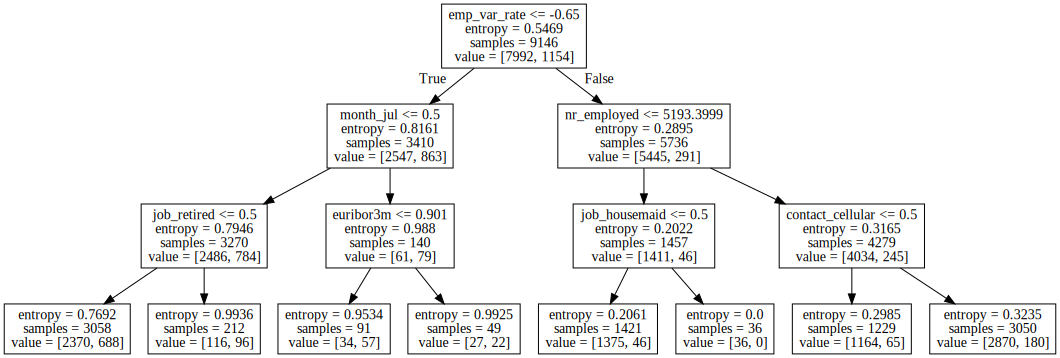

In [236]:
import sklearn.tree as tree
import graphviz
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

export_graphviz(DTC, out_file="mytree.dot", feature_names=x_train.columns)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

It seems that the most important indicator of converting a client to subscribe to a term deposit with this
specific instance of DTC is the employment variation rate.

It is helpful to look at the Random Forest Classifier as it is better than the Decision Tree in terms of robustness but difficult to comprehend and computationally intensive.

In [248]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

parameter_grid = {'n_estimators': [5, 10, 25, 50],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4, 5, 6],
                  'warm_start': [True, False]}

cross_validation = StratifiedKFold(y_train, n_folds=10)

grid_search = GridSearchCV(RFC,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.8755740214301334
Best parameters: {'n_estimators': 50, 'warm_start': False, 'max_features': 5, 'criterion': 'gini'}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Compare performance between DTC and RFC.

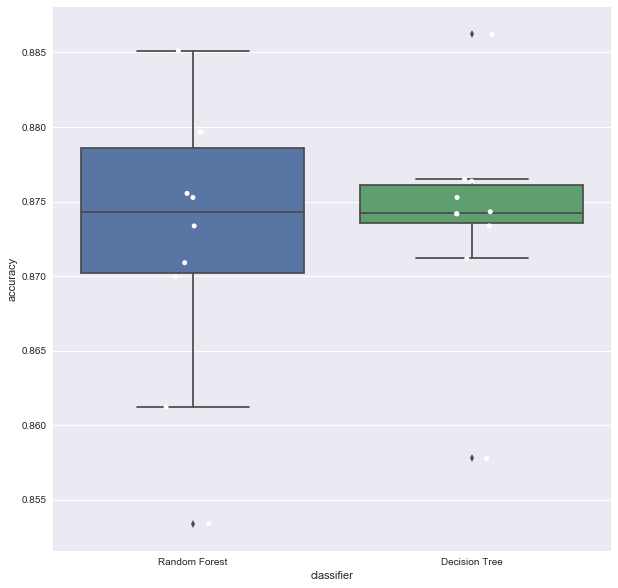

In [249]:
RFC = grid_search.best_estimator_

RF = pd.DataFrame({'accuracy': cross_val_score(RFC, x_train, y_train, cv=10),
                       'classifier': ['Random Forest'] * 10})
DT = pd.DataFrame({'accuracy': cross_val_score(DTC, x_train, y_train, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both = RF.append(DT)

sns.boxplot(x='classifier', y='accuracy', data=both)
sns.stripplot(x='classifier', y='accuracy', data=both, jitter=True, color='white')

The DTC is only slightly better than RFC on average.

We can run the accuracy scores on the test data now.

In [250]:
x_test = test.drop('y', axis=1)
y_test = test['y']

In [251]:
print('DTC Score: ', DTC.score(x_test, y_test))

DTC Score:  0.87381688689


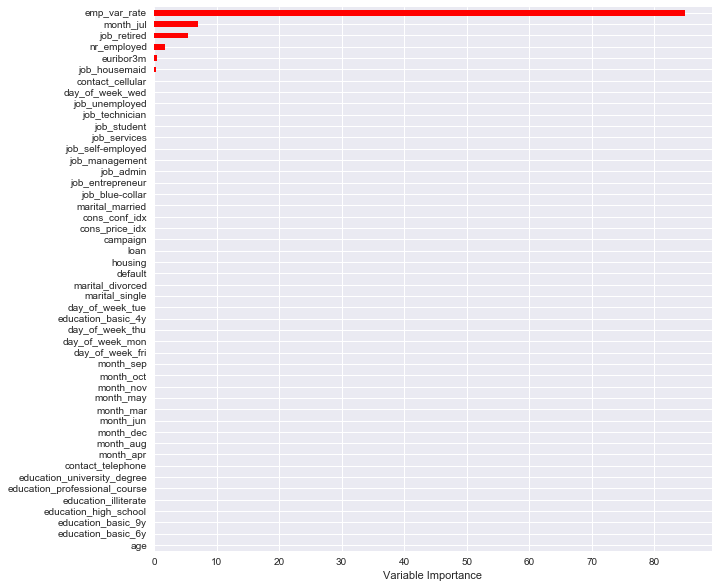

In [252]:
DTC_importance = DTC.feature_importances_*100
rel_imp = pd.Series(DTC_importance, index=x_train.columns).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [253]:
RFC.fit(x_train, y_train)
print('RFC Score: ', RFC.score(x_test, y_test))

RFC Score:  0.874144878643


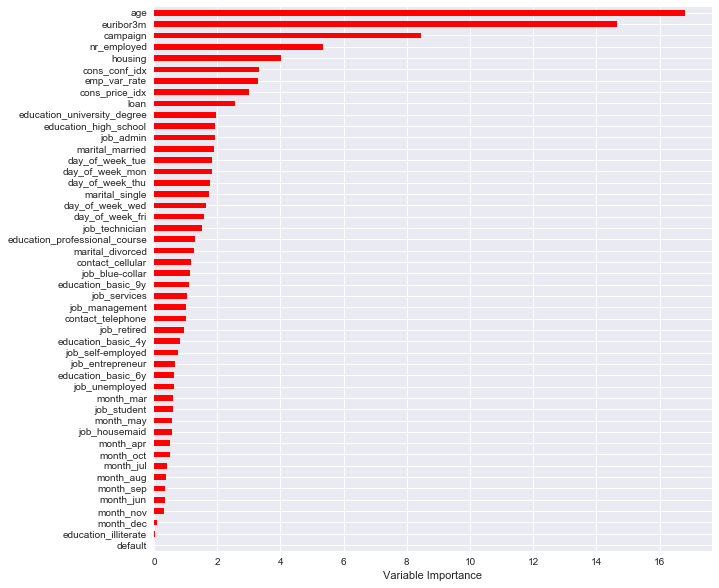

In [254]:
RFC_importance = RFC.feature_importances_*100
rel_imp = pd.Series(RFC_importance, index=x_train.columns).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Very interesting difference in feature importance from both models. DTC implies that employment variation rate is the most importance feature, while RFC shows age is the most important.

# Gradient Boosting and Logistic Regression

In [246]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()

parameter_grid = {'learning_rate': [0.01, 0.1, 1, 5],
                  'n_estimators': [5, 10, 25, 50],
                  'max_features': [1, 2, 3, 4],
                  'warm_start': [True, False]}

cross_validation = StratifiedKFold(y_train, n_folds=10)

grid_search = GridSearchCV(GBC,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

/Users/mac/anaconda/envs/venv/lib/python3.5/site-packages/sklearn/ensemble/gradient_boosting.py:517: RuntimeWarning: overflow encountered in double_scalars
  tree.value[leaf, 0, 0] = numerator / denominator
/Users/mac/anaconda/envs/venv/lib/python3.5/site-packages/sklearn/ensemble/gradient_boosting.py:490: RuntimeWarning: invalid value encountered in multiply
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))
/Users/mac/anaconda/envs/venv/lib/python3.5/site-packages/sklearn/ensemble/gradient_boosting.py:490: RuntimeWarning: invalid value encountered in subtract
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))
/Users/mac/anaconda/envs/venv/lib/python3.5/site-packages/sklearn/ensemble/gradient_boosting.py:517: RuntimeWarning: overflow encountered in double_scalars
  tree.value[leaf, 0, 0] = numerator / denominator
/Users/mac/anaconda/envs/venv/lib/python3.5/site-packages/sklearn/ensemble/gradient_boosting.py:490: RuntimeWarning: invalid value encountered i

Best score: 0.8792914935490925
Best parameters: {'n_estimators': 50, 'learning_rate': 0.1, 'warm_start': False, 'max_features': 4}


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=4, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [247]:
GBC = grid_search.best_estimator_
GBC.score(x_test, y_test)

0.87831505950707522

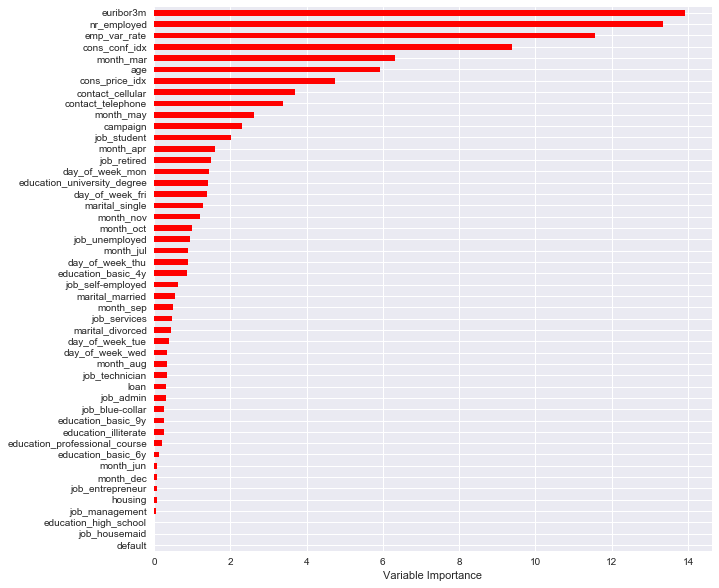

In [279]:
GBC_importance = GBC.feature_importances_*100
rel_imp = pd.Series(GBC_importance, index=x_train.columns).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [267]:
from sklearn.linear_model import LogisticRegression

LGR = LogisticRegression()

parameter_grid = {'C': [0.01, 0.1, 1, 5],
                  'fit_intercept':[True, False],
                  'class_weight': ['balanced', None],
                  'warm_start': [True, False]}

cross_validation = StratifiedKFold(y_train, n_folds=10)

grid_search = GridSearchCV(LGR,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.878744806472775
Best parameters: {'fit_intercept': True, 'class_weight': None, 'warm_start': True, 'C': 0.01}


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=True)

In [270]:
LGR = grid_search.best_estimator_
LGR.score(x_test, y_test)

0.87967388248524037

In summary, logistic regression delivers the highest accuracy score on the test data: 88.0%

# Further Research

1) Improve on the EDA with more insightful charts.

2) Could use PCA to reduce the number of dimensions because some features are highly correlated.

3) Additional gridsearch parameter tuning to get closer or above 90% accuracy score